# 다음 분기에 어떤 게임을 설계해야 할까

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


In [3]:
df = pd.read_csv("vgames2.csv")
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [5]:
df.duplicated().sum() #중복값 없음

0

In [6]:
df.isnull().sum() #결측치 확인

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

1. Unnamed: 0 열 삭제
2. Year, Genre, Publisher 결측값 처리
3. 6열 ~ 9열은 출고량으로 float로 변경

In [7]:
df.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [8]:
df_c = df.copy()



---
##데이터 전처리



In [9]:
#unnamed 삭제
df_c = df_c.drop('Unnamed: 0', axis =1)
df_c.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [10]:
#nan값 삭제
df_c = df_c.dropna()

In [11]:
df_c.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [12]:
#sales값 정리 -> 단위는 M으로 설정

import re

def convert(sales):
  sales = re.sub(r"M","",sales)
  sales = re.sub(r'K','000',sales)
  return sales

In [13]:
#df_c.iloc[:,5:]=df_c.iloc[:,5:].apply(convert) # -> 오류,,, str(sales)을 붙이면 이상해짐

In [14]:
df_c['NA_Sales']=df_c['NA_Sales'].apply(convert)

In [15]:
df_c['EU_Sales']=df_c['EU_Sales'].apply(convert)

In [16]:
df_c['JP_Sales']=df_c['JP_Sales'].apply(convert)

In [17]:
df_c['Other_Sales']=df_c['Other_Sales'].apply(convert)

In [18]:
df_c.iloc[:,5:9]=df_c.iloc[:,5:9].astype('float')

In [19]:
#k값을 1000000으로 나눠주기
N=df_c[df_c['NA_Sales']>=100]
N10 = N['NA_Sales']/1000000
N10.index #이걸 원본에 넣기..
df_c.loc[N10.index,'NA_Sales'] = N10

In [20]:
d=df_c[df_c['EU_Sales']>=100]
d10 = d['EU_Sales']/1000000
d10.index #이걸 원본에 넣기..
df_c.loc[d10.index,'EU_Sales'] = d10

In [21]:
J=df_c[df_c['JP_Sales']>=100]
J10 = J['JP_Sales']/1000000
J10.index #이걸 원본에 넣기..
df_c.loc[J10.index,'JP_Sales'] = J10

In [22]:
O=df_c[df_c['Other_Sales']>=100]
O10 = O['Other_Sales']/1000000
O10.index #이걸 원본에 넣기..
df_c.loc[O10.index,'Other_Sales'] = O10



---



In [23]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.7+ MB


In [24]:
#년도 정리
df_c['Year'].astype(int).astype(str).unique()

array(['2008', '2009', '2010', '2005', '2011', '2007', '2001', '2003',
       '2006', '2014', '2015', '2002', '1997', '2013', '1996', '2004',
       '2000', '1984', '1998', '2016', '1985', '1999', '9', '97', '1995',
       '1993', '2012', '1987', '1982', '11', '1994', '1990', '15', '1992',
       '1991', '1983', '1988', '1981', '3', '1989', '96', '6', '8',
       '1986', '1', '5', '4', '10', '98', '7', '16', '86', '14', '95',
       '2017', '1980', '2020', '2', '13', '0', '12', '94'], dtype=object)

In [25]:
#year 정리
def year(x):
  if (x>=0)&(x<20):
    return int(2000+x)
  elif (x>80)&(x<100):
    return int(1900+x)
  else:
    return int(x)

df_c['Year']=df_c['Year'].apply(year)   

In [26]:
df_c.Year.describe()

count    16241.000000
mean      2006.406748
std          5.832087
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [27]:
df_c1=df_c.reset_index() #인덱스 재정렬

In [28]:
df_c1=df_c1.drop('index',axis=1)



---

##지역에 따라서 선호하는 게임 장르가 다를까
H0: 지역에 따라서 선호하는 게임 장르가 같다<br/>
H1: 지역에 따라서 선호하는 게임 장르가 다르다


In [29]:
df_genre=df_c1.groupby('Genre').sum()
df_genre

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,
Action,6505617,858.75,513.64,156.60,183.99
Adventure,2546304,101.79,63.66,51.87,16.70
Fighting,1673860,220.35,99.90,87.14,36.15
Misc,3374273,394.73,208.15,104.18,72.64
Platform,1749321,445.38,200.63,130.53,51.45
Puzzle,1134959,121.58,50.47,56.24,12.44
Racing,2443902,354.70,235.02,56.32,76.51
Role-Playing,2940339,318.76,183.09,342.93,56.73
Shooter,2567579,574.48,310.23,38.18,101.86


In [30]:
df_genre=df_genre.drop('Year',axis=1)

In [31]:
df_genr1=df_c1.groupby('Genre').sum().reset_index()
df_genr1

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,6505617,858.75,513.64,156.60,183.99
1,Adventure,2546304,101.79,63.66,51.87,16.70
2,Fighting,1673860,220.35,99.90,87.14,36.15
3,Misc,3374273,394.73,208.15,104.18,72.64
4,Platform,1749321,445.38,200.63,130.53,51.45
5,Puzzle,1134959,121.58,50.47,56.24,12.44
6,Racing,2443902,354.70,235.02,56.32,76.51
7,Role-Playing,2940339,318.76,183.09,342.93,56.73
8,Shooter,2567579,574.48,310.23,38.18,101.86
9,Simulation,1697540,181.43,112.99,63.54,31.32


In [32]:
df_genre_melt= pd.melt(df_genre.reset_index(),id_vars=['Genre'])
df_genre_melt

,Genre,variable,value
0,Action,NA_Sales,858.75
1,Adventure,NA_Sales,101.79
2,Fighting,NA_Sales,220.35
3,Misc,NA_Sales,394.73
4,Platform,NA_Sales,445.38
5,Puzzle,NA_Sales,121.58
6,Racing,NA_Sales,354.70
7,Role-Playing,NA_Sales,318.76
8,Shooter,NA_Sales,574.48
9,Simulation,NA_Sales,181.43


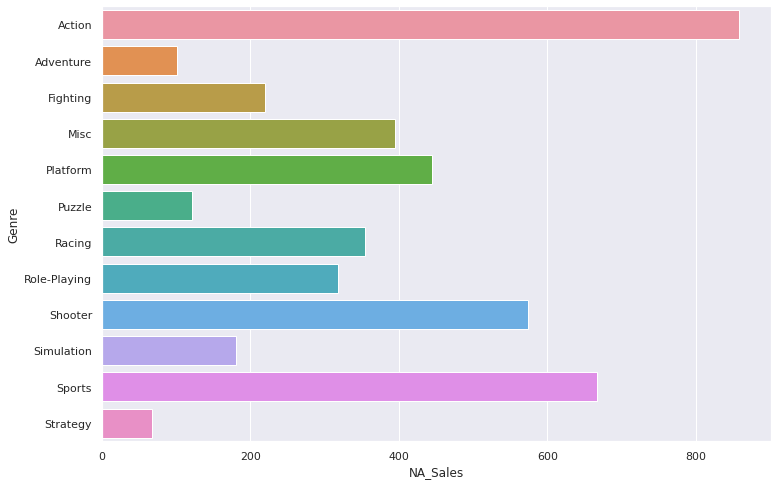

In [33]:
#장르에 따른 북미지역의 출고량의 합
NA_Sales=df_c1.groupby('Genre',as_index=False)['NA_Sales'].sum()
sns.set(rc = {'figure.figsize':(12,8)})
sns.barplot(data=NA_Sales, y='Genre', x= 'NA_Sales')

In [34]:
#장르에 따른 유럽지역의 출고량의 합
EU_Sales=df_c1.groupby('Genre',as_index=False)['EU_Sales'].sum()

In [35]:
#장르에 따른 일본지역의 출고량의 합
JP_Sales=df_c1.groupby('Genre',as_index=False)['JP_Sales'].sum()

In [36]:
#장르에 따른 기타지역의 출고량의 합
Other_Sales = df_c1.groupby('Genre',as_index=False)['Other_Sales'].sum()

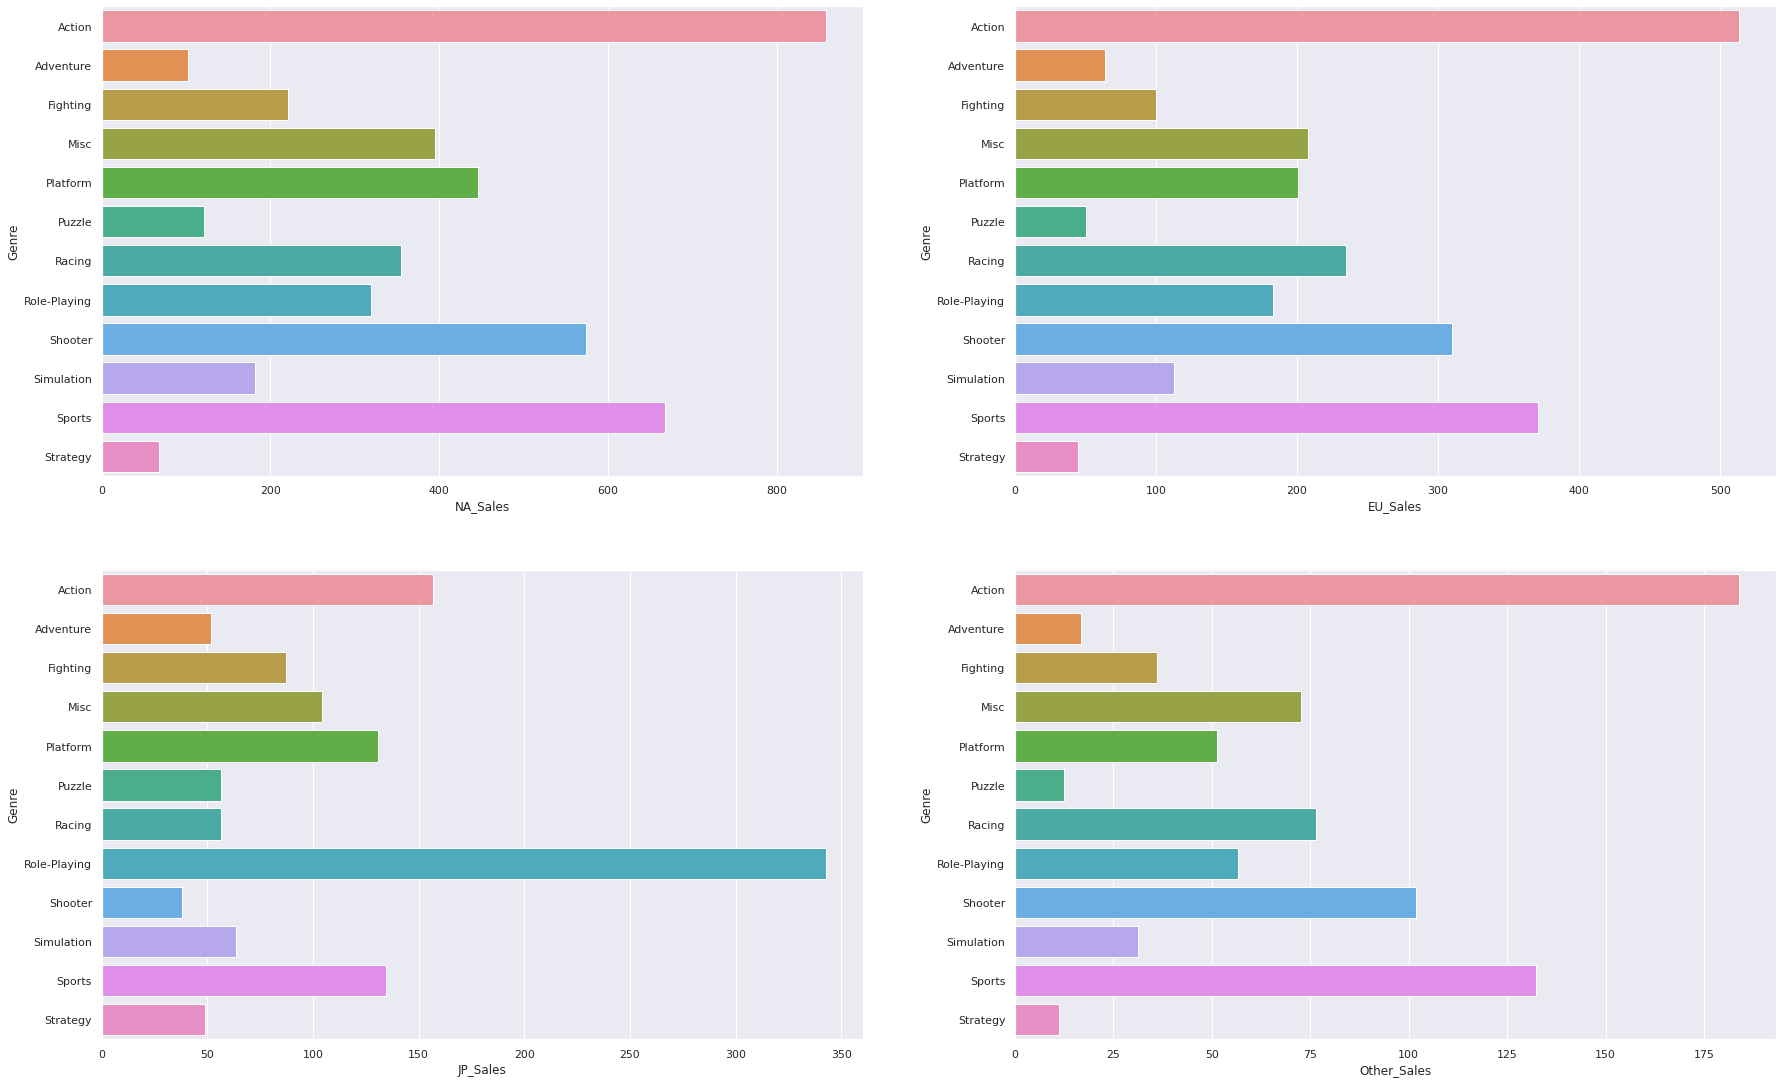

In [37]:
sns.set_style('darkgrid')

sns.set(rc = {'figure.figsize':(30,19)})
fig, ax= plt.subplots(nrows=2, ncols=2)


sns.barplot(data=NA_Sales, y='Genre', x= 'NA_Sales',ax=ax[0,0])
sns.barplot(data=EU_Sales, y='Genre', x= 'EU_Sales',ax=ax[0,1])
sns.barplot(data=JP_Sales, y='Genre', x= 'JP_Sales',ax=ax[1,0])
sns.barplot(data=Other_Sales, y='Genre', x= 'Other_Sales',ax=ax[1,1])

Text(0.5, 1.0, 'Genre per Sales')

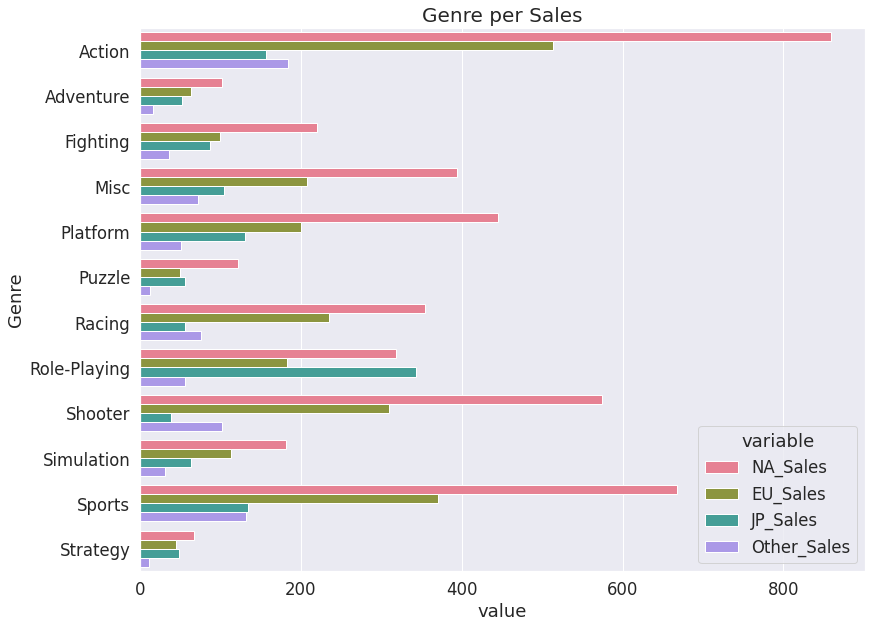

In [38]:
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(13,10)}, font_scale=1.5)
#colors=['cornflowerblue','greenyellow','yiolet','salmon']

sns.barplot(data=df_genre_melt, y='Genre', x= 'value',
            hue='variable',palette='husl')
plt.title('Genre per Sales', size=20)

In [39]:
#상관계수
df_c1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].corr()
#일본을 제외하고 나머지는 상관관계가 높다고 볼 수 있다. 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.768906,0.449358,0.634707
EU_Sales,0.768906,1.000000,0.432350,0.728084
JP_Sales,0.449358,0.432350,1.000000,0.285395
Other_Sales,0.634707,0.728084,0.285395,1.000000


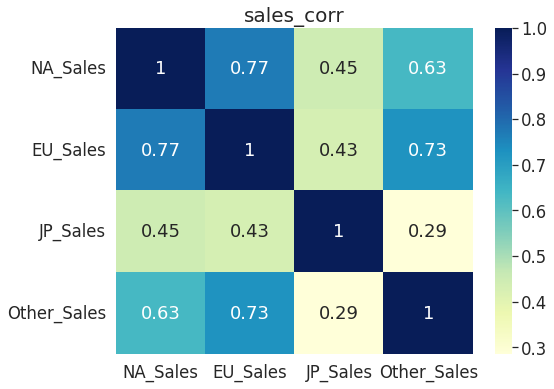

In [40]:
plt.figure(figsize=(8,6))
ax=sns.heatmap(df_c1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].corr(),
               annot=True, cmap='YlGnBu')
plt.title('sales_corr',size=20);


일본지역은 Role-Playing, 북미, 유럽, 기타지역에서는 action, sports장르가 가장 출고량이 높게 나왔다.  <br/> 따라서 귀무가설 기각, 대립가설인 **지역에 따라서 선호하는 게임은 다르다**를 채택한다. 하지만 상관관계표를 봤을 때 북미와 유럽의 상관관계가 높다. 일본을 제외한 나머지 지역은 장르가 다르지않다고 볼 수 있다.
다음 분기에서는 일본을 대상으로 한다면 roloplaying, 나머지 지역을 대상으로 한다면 action또는 sports으로 게임장르를 정할 수 있다.



---

!가설검정!

In [41]:
#북미와 유럽 장르에 따른 판매량 평균이 다른지 검정
!pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import scipy

scipy.__version__

'1.7.3'

In [43]:
from scipy import stats
from scipy.stats import f_oneway


f_oneway(df_genre.NA_Sales, df_genre.EU_Sales,df_genre.JP_Sales,df_genre.Other_Sales)
#일원분산분석을 통해 장르에 따른 지역판매량의 합의 평균을 비교해보니 p값이 0.05보다 작으므로
#귀무가설을 기각, 대립가설 채택 -> 다르다

F_onewayResult(statistic=9.050217142562733, pvalue=8.797574909911539e-05)

In [44]:
#H0: 모든 평균이 같다
#H1: 평균 중 하나는 다르다.
f_oneway(df_genre.NA_Sales, df_genre.EU_Sales,df_genre.Other_Sales)
#p값이 0.05보다 작으므로 귀무가설 기각->평균 중 하나는 다르다는 것을 알 수 있다.

F_onewayResult(statistic=9.362038494329722, pvalue=0.0006019350629141223)

In [45]:
#H0: 장르에 따른 북미판매량의 합의 평균과 유럽판매량의 합의 평균이 같다.
#H1: 장르에 따른 북미판매량의 합의 평균과 유럽판매량의 합의 평균이 다르다. 
f_oneway(df_genre.NA_Sales, df_genre.EU_Sales)
#분산분석을 통해 장르에 따른 지역판매량의 합의 평균을 비교해보니 p값이 0.05보다 큰 0.06으로
#귀무가설 채택 -> 북미와 유럽 판매량의 합은 같다.

F_onewayResult(statistic=3.798435303621833, pvalue=0.06416512103221324)

In [46]:
#from statsmodels.formula.api import ols
#from statsmodels.stats.anova import anova_lm
#아노바 해보려고 했는데 어떤 걸 넣어야할지 모르겠어서 고민..


---
## 연도별 게임의 트렌드가 있을까





In [47]:
#2000년이전, 2000년대, 2010년 이후로 나눔
bins = [1980,2000,2010,2020]
labels=['ago_2000','2000','after_2010']
df_c1['years_cut']=pd.cut(df_c1['Year'],bins,labels=labels,right=False)

In [48]:
df_c1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,years_cut
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,2000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,2000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,after_2010
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,after_2010
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,after_2010
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,2000
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,2000
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,after_2010
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,after_2010


In [49]:
df_c1.years_cut.value_counts(normalize=True) #비율 확인 2000년대가 게임출시량가 많음

2000          0.563608
after_2010    0.315209
ago_2000      0.121182
Name: years_cut, dtype: float64

In [50]:
#pd.set_option('display.max_rows', None)

In [51]:
df_years = df_c1.groupby(['years_cut','Platform'],as_index=False).size()

In [52]:
df_years

,years_cut,Platform,size
0,ago_2000,2600,115
1,ago_2000,3DO,3
2,ago_2000,3DS,0
3,ago_2000,DC,21
4,ago_2000,DS,1
...,...,...,...
88,after_2010,Wii,450
89,after_2010,WiiU,143
90,after_2010,X360,680
91,after_2010,XB,0


In [53]:
# ago_2000=df_years.loc['ago_2000']
# p_2000 =df_years.loc['2000']
# after_2010=df_years.loc['after_2010']

Text(0.5, 1.0, '2000year ago')

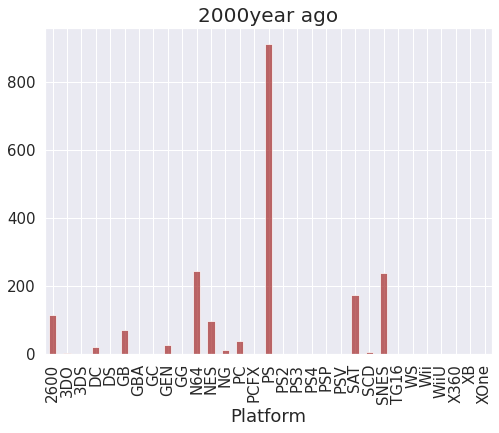

In [54]:
plt.figure(figsize=(8,6))
df_c1.groupby(['years_cut','Platform'])['Name'].count().loc['ago_2000'].plot(
    kind='bar',color='brown',alpha=0.7, fontsize=15)
plt.title('2000year ago',size=20)

Text(0.5, 1.0, '2000year')

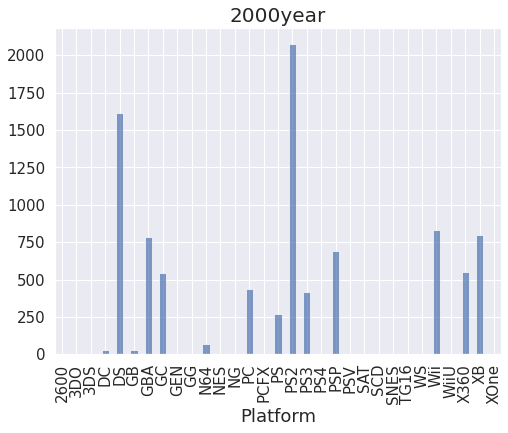

In [55]:
plt.figure(figsize=(8,6))
df_c1.groupby(['years_cut','Platform'])['Name'].count().loc['2000'].plot(
    kind='bar',alpha=0.7,fontsize=15)
plt.title('2000year', size=20)

Text(0.5, 1.0, '2010year after')

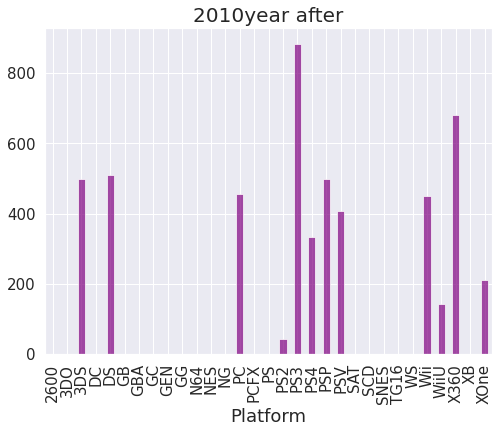

In [56]:
plt.figure(figsize=(8,6))
df_c1.groupby(['years_cut','Platform'])['Name'].count().loc['after_2010'].plot(
    kind='bar',color='purple',alpha=0.7,
    fontsize=15)
plt.title('2010year after', size=20)

In [57]:
# plt.figure(figsize=(8,6))
# df_c1.groupby(['연도별','Platform'])['Name'].count().loc['2000년'].plot(kind='bar',alpha=0.7,label='2000')
# df_c1.groupby(['연도별','Platform'])['Name'].count().loc['2010년_이후'].plot(kind='bar',color='purple',alpha=0.7,label='2010 after')
# df_c1.groupby(['연도별','Platform'])['Name'].count().loc['2000년_이전'].plot(kind='bar',color='brown',alpha=0.7,label='2000 ago')
# plt.title('Year&Platform',size=20)
# plt.legend();

Text(0.5, 1.0, 'Year per Platform')

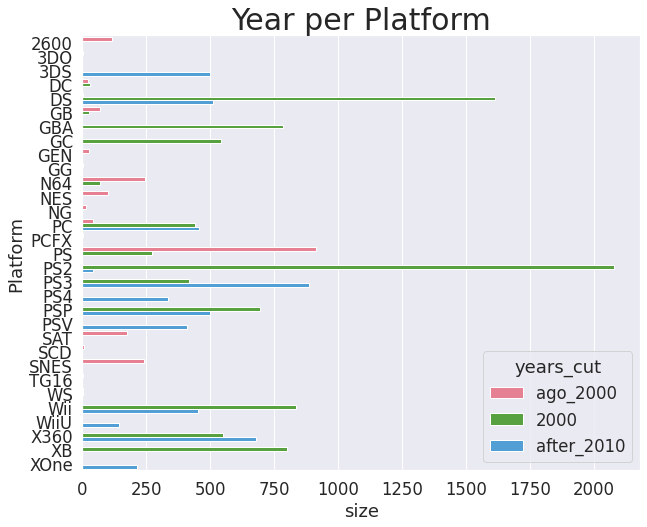

In [58]:
sns.set(rc = {'figure.figsize':(10,8)},
        font_scale=1.5)

sns.barplot(data=df_years, y='Platform', x= 'size',
            hue='years_cut',palette = 'husl');

plt.title('Year per Platform',size=30)

- 1980~1999년 사이에는 플랫폼 중 PS가 가장 많이 출시되었다. PS는 거치용을 뜻하며 거실과 같은 가정의 한 자리에 두고 사용하도록 설계된 비디오 게임기다.
- 2000~2009년 사이에는 PS2 역시 거치용을 뜻하고 가정의 한 자리에 두고 사용하는 것이다.그 다음으로는 DS가 많이 출시되었다. DS는 휴대용이며 닌텐도DS를 뜻한다.
- 2010~2020년은 다양하게 많은 플랫폼이 나왔는데 그 중 PS3, X360, DS, PSP, Wii, PC 등이 있다. PS3과 X360은 거치용이고 DS, PSP, Wii는 휴대용, PC는 컴퓨터용이다. 이 결과를 보면 2010년 이후에는 다양한 플랫폼이 나오는 것을 볼 수 있다. 사람들이 그만큼 한 플랫폼이 아닌 여러개의 플랫폼을 사용하는 것을 알 수 있다.




---

## 출고량의 높은 게임에 대한 분석 및 시각화 프로세스 
다음 분기 게임 제작을 위해 2010년 이후 출고량 높은 순으로 50개만 확인

In [59]:
df_c1['sales_sum']=df_c1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)

In [60]:
sales=df_c1[df_c1['years_cut']=='after_2010'].sort_values(by='sales_sum', ascending=False).head(50)
sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,years_cut,sales_sum
4253,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,after_2010,21.82
3414,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,after_2010,21.39
10695,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,after_2010,16.38
10410,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,after_2010,15.32
2757,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,after_2010,14.76
6119,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,after_2010,14.64
8892,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,after_2010,14.24
4152,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,after_2010,14.04
6257,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,after_2010,13.74
13814,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,after_2010,13.47


In [61]:
#출고량이 높은 게임 확인을 위해 내림차순하기
# sales = df_c1.sort_values(by='sales_sum', ascending=False).head(20) #내림차순
# sales

In [62]:
p_ratio=sales.Platform.value_counts(normalize=True) #index, values로 값 확인
labels=p_ratio.index
p_ratio

PS3     0.28
X360    0.26
PS4     0.14
3DS     0.12
Wii     0.12
DS      0.04
XOne    0.02
WiiU    0.02
Name: Platform, dtype: float64

In [63]:
labels

Index(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU'], dtype='object')

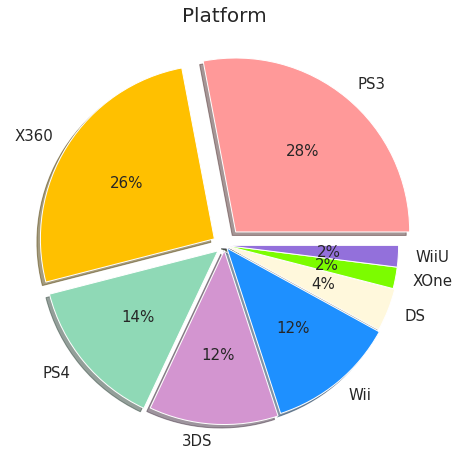

In [64]:
#파이플롯 그려주기
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','dodgerblue','cornsilk','lawngreen','mediumpurple','lavender','turquoise']
explode = [0.1,0.07, 0.05, 0.03, 0.02, 0.01,0,0]

plt.figure(figsize= (8,8))
plt.pie(p_ratio, labels=labels,autopct='%.0f%%',colors=colors, 
         explode=explode,shadow=True, textprops={'size':15})
plt.title('Platform', size=20)
#plt.legend()
plt.show();

2010년 이후 모든 지역의 출고량합이 높은 순으로 내림차순한 50개의 데이터만 가져와 플랫폼의 비율을 확인 해봤다.<br/>
플랫폼으로 출고량을 확인했을 때 PS3와 X360이 제일 인기가 많은 것을 볼 수 있다.

In [82]:
h_ratio=sales.Publisher.value_counts(normalize=True) #index, values로 값 확인
labels=h_ratio.index
h_ratio

Nintendo                       0.22
Activision                     0.22
Electronic Arts                0.16
Microsoft Game Studios         0.10
Take-Two Interactive           0.10
Ubisoft                        0.08
Bethesda Softworks             0.06
Sony Computer Entertainment    0.04
505 Games                      0.02
Name: Publisher, dtype: float64

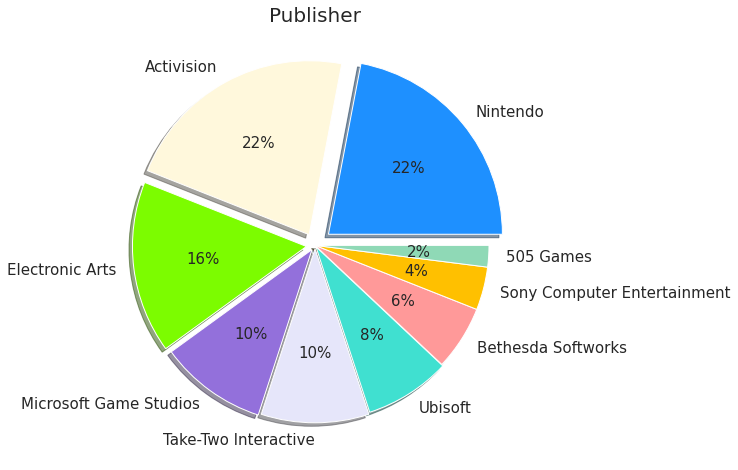

In [83]:
#파이플롯 그려주기
colors = ['dodgerblue','cornsilk','lawngreen','mediumpurple','lavender','turquoise','#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
explode = [0.1,0.07, 0.05, 0.03, 0.02, 0.01,0,0,0]

plt.figure(figsize= (8,8))
plt.pie(h_ratio, labels=labels,autopct='%.0f%%',colors=colors, 
         explode=explode,shadow=True, textprops={'size':15})
plt.title('Publisher', size=20)
#plt.legend()
plt.show();

In [78]:
sales_genre=sales.Genre.value_counts(normalize=True)
sales_genre
labels=sales_genre.index

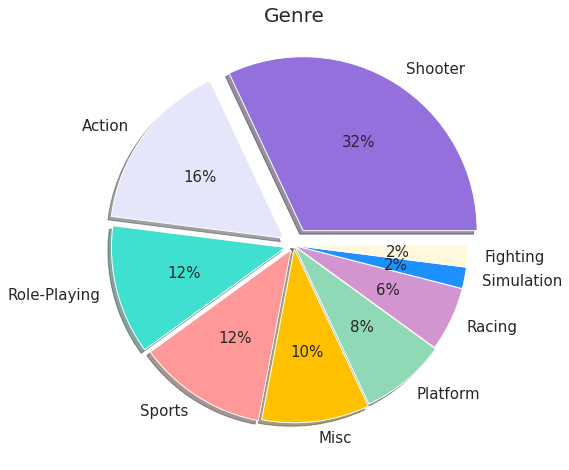

In [81]:
#파이플롯 그려주기
colors = ['mediumpurple','lavender','turquoise','#ff9999', '#ffc000', '#8fd9b6', '#d395d0','dodgerblue','cornsilk','lawngreen']
explode = [0.1,0.07, 0.05, 0.03, 0.02, 0.01,0,0,0]

plt.figure(figsize= (8,8))
plt.pie(sales_genre, labels=labels,autopct='%.0f%%',colors=colors, 
         explode=explode,shadow=True, textprops={'size':15})
plt.title('Genre', size=20)
#plt.legend()
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


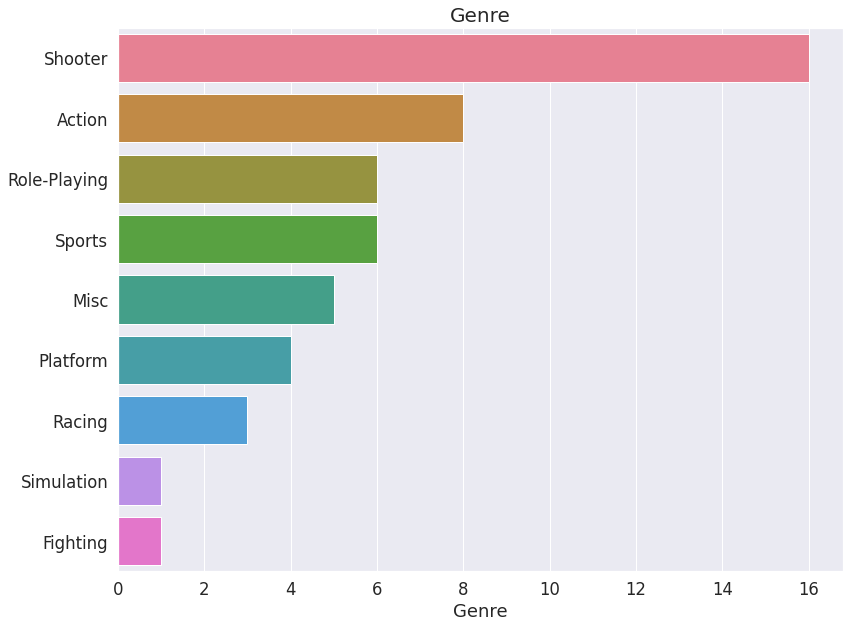

In [66]:
sns.set(rc = {'figure.figsize':(13,10)},
        font_scale=1.5)
sns.barplot(sales_genre, x=sales_genre.values, y=sales_genre.index,
            palette='husl')
plt.title('Genre',size=20);

In [67]:
# colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','coral','lawngreen','mediumpurple','peru','cyan']
# plt.figure(figsize= (8,6))
# sales.Genre.value_counts().plot(kind='bar',color=colors,fontsize=15)
# plt.title('Genre',size=20);

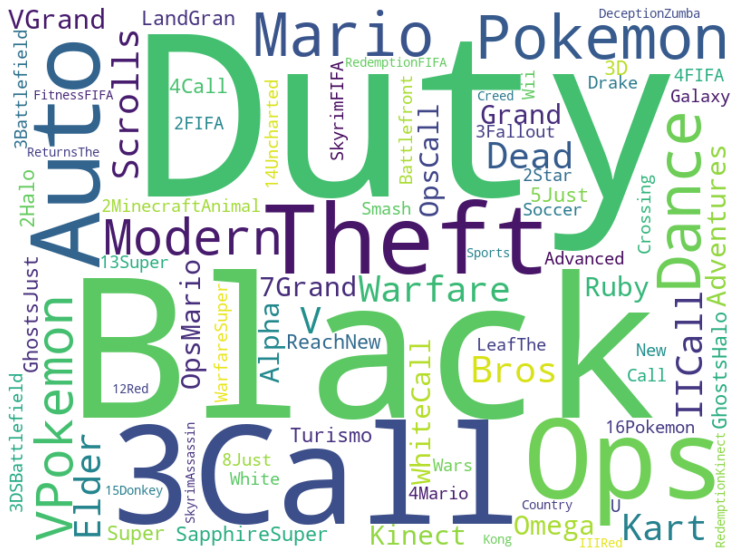

In [68]:
from wordcloud import WordCloud
text = ''.join(sales['Name']) #name을 한 문장으로 만들어줌
wordcloud = WordCloud(background_color='white',
                      width=800,height=600).generate(text)
plt.figure(figsize=(15,10))
plt.axis('off') #축 없애줌
plt.imshow(wordcloud, interpolation='bilinear') #bilinear부드럽게
plt.show()

제일 많이 언급된 Duty,Call,Black은 장르가 Shooter인 'Call of Duty'시리즈 게임으로 제작사가 Activision이다. 그 다음으로 Pokemon과 Mario로 제작사는 닌텐도로 일본지역에서 인기인 게임이다. 